Data Source: https://psa.gov.ph/content/proportion-poor-filipinos-was-recorded-181-percent-2021

In [3]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
# import mapclassify

poverty_df = pd.read_excel("2015, 2018, and 2021 poverty statistics.xlsx", skiprows=4, nrows=124)
poverty_df

ImportError: Pandas requires version '3.0.10' or newer of 'openpyxl' (version '3.0.9' currently installed).

In [345]:
poverty_df.head(10)

,Unnamed: 0,2015,2018,2021p,2015.1,2018.1,2021p.1,2015.2,2018.2,2021p.2,2015.3,2018.3,2021p.3,2015.4,Unnamed: 14,2018.4,Unnamed: 16,2021p.4,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Limit,Upper Limit,Lower Limit,Upper Limit,Lower Limit,Upper Limit
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"PHILIPPINES 1/, 2/",22746.746510,25813.497825,28871.319939,18.012220,12.141214,13.245432,2.142822,1.363736,1.371832,0.385970,0.165574,0.181705,17.377143,18.647296,11.868846,12.413581,12.94653,13.544335
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"National Capital Region (NCR) 1/, 2/",25187.957898,28682.274094,32977.939215,2.781379,1.434062,2.168311,10.699092,10.381595,6.701921,0.297582,0.148879,0.145318,2.291736,3.271023,1.189159,1.678965,1.929264,2.407358
5,"1st District b/, c/, d/",25187.957898,28682.274094,32977.939215,3.625376,1.933411,1.070457,25.377486,30.829159,32.884283,0.920029,0.596054,0.352012,2.111556,5.139195,0.95291,2.913912,0.491402,1.649512
6,"2nd District b/, c/",25187.957898,28682.274094,32977.939215,1.912344,1.426553,1.630221,20.639190,20.137031,15.917343,0.394692,0.287265,0.259488,1.262916,2.561773,0.954005,1.899101,1.203367,2.057074
7,"3rd District 2/, b/",25187.957898,28682.274094,32977.939215,3.405747,2.177679,3.292470,20.991840,13.847212,10.767067,0.714929,0.301548,0.354502,2.2294,4.582093,1.681637,2.673721,2.709319,3.875622
8,"4th District 1/, 2/",25187.957898,28682.274094,32977.939215,3.081713,0.697243,2.531657,19.594118,14.476998,9.046331,0.603834,0.100940,0.229022,2.088162,4.075265,0.531199,0.863288,2.154919,2.908395
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
poverty_df.columns

Index([ 'Unnamed: 0',          2015,          2018,       '2021p',
            '2015.1',      '2018.1',     '2021p.1',      '2015.2',
            '2018.2',     '2021p.2',      '2015.3',      '2018.3',
           '2021p.3',      '2015.4', 'Unnamed: 14',      '2018.4',
       'Unnamed: 16',     '2021p.4', 'Unnamed: 18'],
      dtype='object')

In [266]:
poverty_df['Province'] = poverty_df['Unnamed: 0']
poverty_df = poverty_df.drop(columns=['Unnamed: 0'])

In [267]:
poverty_df = poverty_df[['Province', 2015, 2018, "2021p"]]
poverty_df

,Province,2015,2018,2021p
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,"PHILIPPINES 1/, 2/",22746.746510,25813.497825,28871.319939
3,NaN,NaN,NaN,NaN
4,"National Capital Region (NCR) 1/, 2/",25187.957898,28682.274094,32977.939215
...,...,...,...,...
119,"Basilan 1/, 2/",21472.098606,26950.662825,26728.268055
120,"Lanao del Sur 1/, 2/",24420.571948,29223.924914,29082.521439
121,Maguindanao 2/,20399.214064,25368.266546,25370.557436
122,"Sulu 1/, 2/",23114.506512,29149.780615,31782.457905


In [268]:
poverty_2021_dropped = poverty_df.dropna()
poverty_2021_dropped

,Province,2015,2018,2021p
2,"PHILIPPINES 1/, 2/",22746.746510,25813.497825,28871.319939
4,"National Capital Region (NCR) 1/, 2/",25187.957898,28682.274094,32977.939215
5,"1st District b/, c/, d/",25187.957898,28682.274094,32977.939215
6,"2nd District b/, c/",25187.957898,28682.274094,32977.939215
7,"3rd District 2/, b/",25187.957898,28682.274094,32977.939215
...,...,...,...,...
119,"Basilan 1/, 2/",21472.098606,26950.662825,26728.268055
120,"Lanao del Sur 1/, 2/",24420.571948,29223.924914,29082.521439
121,Maguindanao 2/,20399.214064,25368.266546,25370.557436
122,"Sulu 1/, 2/",23114.506512,29149.780615,31782.457905


In [269]:
# Define the list of substrings to remove
substrings_to_remove = ['\*', ' a/', ' b/', ' c/', ' d/', '1/', '2/', ',']

# Apply the str.replace() method to remove the specified substrings
poverty_2021_dropped['Province'] = poverty_2021_dropped['Province'].replace('|'.join(substrings_to_remove), '', regex=True).str.strip()

# Remove trailing spaces from the end of the 'Name' column
poverty_2021_dropped['Province'] = poverty_2021_dropped['Province'].str.rstrip()
poverty_2021_dropped['Province'] = poverty_2021_dropped['Province'].str.replace('\n', '')

poverty_2021_dropped

C:\Users\JEREMI~1\AppData\Local\Temp/ipykernel_9252/852201358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poverty_2021_dropped['Province'] = poverty_2021_dropped['Province'].replace('|'.join(substrings_to_remove), '', regex=True).str.strip()
C:\Users\JEREMI~1\AppData\Local\Temp/ipykernel_9252/852201358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poverty_2021_dropped['Province'] = poverty_2021_dropped['Province'].str.rstrip()
C:\Users\JEREMI~1\AppData\Local\Temp/ipykernel_9252/852201358.py:9:

,Province,2015,2018,2021p
2,PHILIPPINES,22746.746510,25813.497825,28871.319939
4,National Capital Region (NCR),25187.957898,28682.274094,32977.939215
5,1st District,25187.957898,28682.274094,32977.939215
6,2nd District,25187.957898,28682.274094,32977.939215
7,3rd District,25187.957898,28682.274094,32977.939215
...,...,...,...,...
119,Basilan,21472.098606,26950.662825,26728.268055
120,Lanao del Sur,24420.571948,29223.924914,29082.521439
121,Maguindanao,20399.214064,25368.266546,25370.557436
122,Sulu,23114.506512,29149.780615,31782.457905


poverty_2021_dropped = poverty_2021_dropped.reset_index()
poverty_2021_dropped

*Country level data*

In [328]:
country_stat = poverty_2021_dropped.iloc[[0]].copy()
country_stat

,Province,2015,2018,2021p
2,PHILIPPINES,22746.74651,25813.497825,28871.319939


In [341]:
country_stat.to_csv('file1.csv')

TypeError: __init__() got an unexpected keyword argument 'line_terminator'

In [329]:
country_stat_melted = pd.melt(country_stat, id_vars='Province', var_name='Year', value_name='Value')
country_stat_melted

,Province,Year,Value
0,PHILIPPINES,2015,22746.746510
1,PHILIPPINES,2018,25813.497825
2,PHILIPPINES,2021p,28871.319939


<AxesSubplot:>

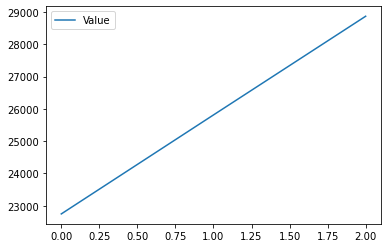

In [330]:
country_stat_melted.plot()

*Region level data*

In [271]:
# Extract rows that contain the keyword 'region' in a case-insensitive manner or rows that contain '(' or ')' in the 'Name' column
region_stat = poverty_2021_dropped[poverty_2021_dropped['Province'].str.contains('region', case=False) | poverty_2021_dropped['Province'].str.contains('\(|\)')]
region_stat = region_stat.reset_index()

# Display the extracted rows
region_stat

,index,Province,2015,2018,2021p
0,4,National Capital Region (NCR),25187.957898,28682.274094,32977.939215
1,10,Cordillera Administrative Region (CAR),22984.754947,24906.728965,28304.097053
2,18,Region I (Ilocos Region),22761.850315,27054.966438,31113.052005
3,24,Region II (Cagayan Valley),22621.596005,25098.501823,28292.064618
4,31,Region III (Central Luzon),22867.100997,26954.396464,31584.338561
5,40,Region IV-A (CALABARZON),25641.804340,27927.847358,31058.641375
6,47,MIMAROPA REGION,20368.566617,23314.746744,26321.186307
7,54,Region V (Bicol Region),22503.415748,24461.023380,27675.257339
8,62,Region VI (Western Visayas),21920.636705,24494.368646,27083.231684
9,70,Region VII (Central Visayas),22644.258283,25744.796026,31219.821174


In [272]:
print(len(filtered_rows), "regions")

17 regions


In [273]:
province_stat = poverty_2021_dropped[~(poverty_2021_dropped['Province'].str.contains('region', case=False) | poverty_2021_dropped['Province'].str.contains('\(|\)'))]
province_stat = province_stat.reset_index()
province_stat

,index,Province,2015,2018,2021p
0,2,PHILIPPINES,22746.746510,25813.497825,28871.319939
1,5,1st District,25187.957898,28682.274094,32977.939215
2,6,2nd District,25187.957898,28682.274094,32977.939215
3,7,3rd District,25187.957898,28682.274094,32977.939215
4,8,4th District,25187.957898,28682.274094,32977.939215
...,...,...,...,...,...
82,119,Basilan,21472.098606,26950.662825,26728.268055
83,120,Lanao del Sur,24420.571948,29223.924914,29082.521439
84,121,Maguindanao,20399.214064,25368.266546,25370.557436
85,122,Sulu,23114.506512,29149.780615,31782.457905


In [274]:
province_stat.head(10)

,index,Province,2015,2018,2021p
0,2,PHILIPPINES,22746.746510,25813.497825,28871.319939
1,5,1st District,25187.957898,28682.274094,32977.939215
2,6,2nd District,25187.957898,28682.274094,32977.939215
3,7,3rd District,25187.957898,28682.274094,32977.939215
4,8,4th District,25187.957898,28682.274094,32977.939215
5,11,Abra,21294.142919,23595.708336,29321.361713
6,12,Apayao,23310.439639,23134.798797,25693.550974
7,13,Benguet,21935.346572,24157.976519,27519.077627
8,14,Ifugao,25132.922813,26429.393163,28734.239538
9,15,Kalinga,21266.592694,24218.991530,25447.363145


In [275]:
province_stat = province_stat.drop(range(5), axis=0)
province_stat

,index,Province,2015,2018,2021p
5,11,Abra,21294.142919,23595.708336,29321.361713
6,12,Apayao,23310.439639,23134.798797,25693.550974
7,13,Benguet,21935.346572,24157.976519,27519.077627
8,14,Ifugao,25132.922813,26429.393163,28734.239538
9,15,Kalinga,21266.592694,24218.991530,25447.363145
...,...,...,...,...,...
82,119,Basilan,21472.098606,26950.662825,26728.268055
83,120,Lanao del Sur,24420.571948,29223.924914,29082.521439
84,121,Maguindanao,20399.214064,25368.266546,25370.557436
85,122,Sulu,23114.506512,29149.780615,31782.457905


In [276]:
import geopandas as gpd
provinces_gdf = gpd.read_file("provinces_geom.geojson")
provinces_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,179,PHL,Philippines,1,Abra,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((120.96795 17.95706, 120.97803 ..."
1,179,PHL,Philippines,2,Agusan del Norte,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((125.57724 9.45679, 125.59687 9..."
2,179,PHL,Philippines,3,Agusan del Sur,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((125.91087 8.85625, 125.91461 8..."
3,179,PHL,Philippines,4,Aklan,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,179,PHL,Philippines,5,Albay,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
...,...,...,...,...,...,...,...,...,...,...
76,179,PHL,Philippines,77,Tawi-Tawi,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
77,179,PHL,Philippines,78,Zambales,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ..."
78,179,PHL,Philippines,79,Zamboanga del Norte,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7..."
79,179,PHL,Philippines,80,Zamboanga del Sur,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6..."


In [277]:
# Setting the indices equal to keys that should be equal
province_stat.set_index('Province', inplace=True)
provinces_gdf.set_index('NAME_1', inplace=True)

# Find keys that are present in df1 but not in df2
unmatched_keys_province_stat = province_stat.index.difference(provinces_gdf.index)

# Find keys that are present in df2 but not in df1
unmatched_keys_provinces_gdf = provinces_gdf.index.difference(province_stat.index)

# Combine the unmatched keys from both dataframes
unmatched_keys = unmatched_keys_province_stat.union(unmatched_keys_provinces_gdf)
unmatched_keys

Index(['Compostela Valley', 'Cotabato', 'Cotabato City', 'Davao de Oro',
       'Isabela City', 'Metropolitan Manila', 'Mountain Province',
       'Mt. Province', 'North Cotabato', 'Surigao Del Norte',
       'Surigao Del Sur', 'Surigao del Norte', 'Surigao del Sur', 'Tawi-Tawi',
       'Tawi-tawi'],
      dtype='object')

In [278]:
unmatched_keys_province_stat

Index(['Cotabato', 'Cotabato City', 'Davao de Oro', 'Isabela City',
       'Mt. Province', 'Surigao Del Norte', 'Surigao Del Sur', 'Tawi-tawi'],
      dtype='object')

In [279]:
unmatched_keys_provinces_gdf

Index(['Compostela Valley', 'Metropolitan Manila', 'Mountain Province',
       'North Cotabato', 'Surigao del Norte', 'Surigao del Sur', 'Tawi-Tawi'],
      dtype='object')

In [280]:
provinces_gdf = provinces_gdf.reset_index()
replacement_province_gdf_dict = {'Compostela Valley': 'Davao de Oro', 
                                 'Mountain Province': 'Mt. Province',
                                 'North Cotabato': "Cotabato",
                                 'Surigao del Norte' : "Surigao Del Norte",
                                 'Surigao del Sur' : 'Surigao Del Sur',
                                 'Tawi-Tawi' : 'Tawi-tawi'}

# Replace values in the 'Status' column using the dictionary
provinces_gdf['NAME_1'] = provinces_gdf['NAME_1'].replace(replacement_province_gdf_dict)
provinces_gdf

,NAME_1,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,Abra,179,PHL,Philippines,1,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((120.96795 17.95706, 120.97803 ..."
1,Agusan del Norte,179,PHL,Philippines,2,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((125.57724 9.45679, 125.59687 9..."
2,Agusan del Sur,179,PHL,Philippines,3,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((125.91087 8.85625, 125.91461 8..."
3,Aklan,179,PHL,Philippines,4,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,Albay,179,PHL,Philippines,5,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
...,...,...,...,...,...,...,...,...,...,...
76,Tawi-tawi,179,PHL,Philippines,77,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
77,Zambales,179,PHL,Philippines,78,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ..."
78,Zamboanga del Norte,179,PHL,Philippines,79,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7..."
79,Zamboanga del Sur,179,PHL,Philippines,80,Lalawigan|Probinsya,Province,NaN,NaN,"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6..."


In [281]:
province_stat = province_stat.reset_index()

provinces_gdf = provinces_gdf[provinces_gdf["NAME_1"] != "Metropolitan Manila"]
strings_to_drop = ['Cotabato City', 'Isabela City', 'Metropolitan Manila']
province_stat = province_stat[~province_stat['Province'].isin(strings_to_drop)]

In [282]:
# Setting the indices equal to keys that should be equal
province_stat.set_index('Province', inplace=True)
provinces_gdf.set_index('NAME_1', inplace=True)

# Find keys that are present in df1 but not in df2
unmatched_keys_province_stat = province_stat.index.difference(provinces_gdf.index)

# Find keys that are present in df2 but not in df1
unmatched_keys_provinces_gdf = provinces_gdf.index.difference(province_stat.index)

# Combine the unmatched keys from both dataframes
unmatched_keys = unmatched_keys_province_stat.union(unmatched_keys_provinces_gdf)
unmatched_keys

Index([], dtype='object')

*Province level data*

In [285]:
province_stat = province_stat.reset_index()
province_stat

,Province,index,2015,2018,2021p
0,Abra,11,21294.142919,23595.708336,29321.361713
1,Apayao,12,23310.439639,23134.798797,25693.550974
2,Benguet,13,21935.346572,24157.976519,27519.077627
3,Ifugao,14,25132.922813,26429.393163,28734.239538
4,Kalinga,15,21266.592694,24218.991530,25447.363145
...,...,...,...,...,...
75,Basilan,119,21472.098606,26950.662825,26728.268055
76,Lanao del Sur,120,24420.571948,29223.924914,29082.521439
77,Maguindanao,121,20399.214064,25368.266546,25370.557436
78,Sulu,122,23114.506512,29149.780615,31782.457905


In [2]:
merged_df = pd.merge(province_stat, provinces_gdf, left_on='Province', right_on='NAME_1')
merged_df

NameError: name 'province_stat' is not defined

In [3]:
import geopandas as gpd
geo_merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry', crs='EPSG:4326')
geo_merged_df

NameError: name 'merged_df' is not defined

<AxesSubplot:>

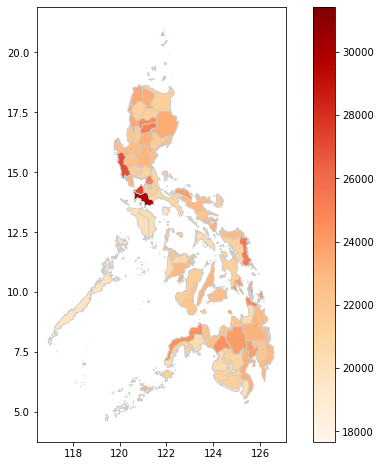

In [315]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Specify the column to plot (Value in this case)
geo_merged_df.plot(column=2015, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot:>

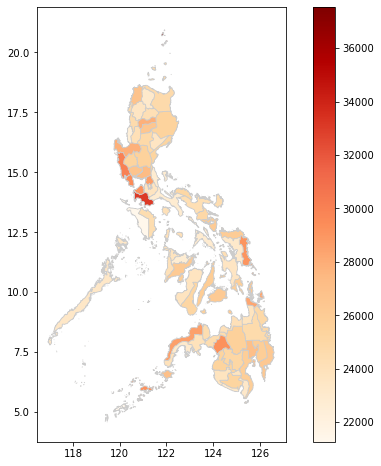

In [316]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Specify the column to plot (Value in this case)
geo_merged_df.plot(column=2018, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot:>

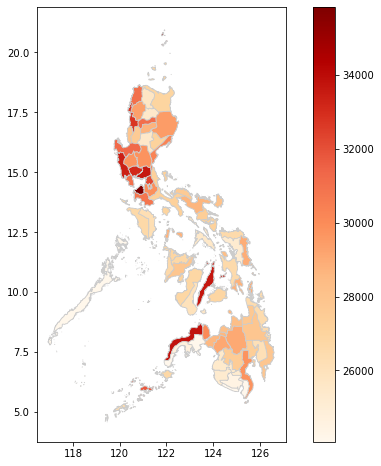

In [317]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Specify the column to plot (Value in this case)
geo_merged_df.plot(column="2021p", cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)